## A simple Susceptible-Infected-Recovered (SIR) model
**Jonathan Conning**

The SIR model is explained in many places (e.g. [here](https://triplebyte.com/blog/modeling-infectious-diseases)). Economists have recently taken to analyzing them, sometimes embedded in a larger economics model. For example this [NBER paper](https://www.nber.org/papers/w26902) working paper written for economists by James Stock. 

This notebook just shows a plain vanilla SIR model. 

The python code below was inspired by this ['Coronavirus Curve - Numberphile video](https://www.youtube.com/watch?v=k6nLfCbAzgo) where they show how to code something similar using Geogebra.

If you see code below, you can also run this as a [web app](https://ricardian.herokuapp.com/) to move parameter sliders. 
If you don't see code but want to see it, find it on github [here](https://github.com/jhconning/Econ-Teach/blob/master/notebooks/epidemic/SIRmodel.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

### Initial Parameters

In [2]:
N = 1          # Size of the population (so everything in proportions)
I0 = 0.01      # Initial proportion of the population infected
S0 = N - I0    # Initial proportion of the population susceptible
R0 = 0.0       # Initial proportion of the population recovered
maxT = 25      # max number of periods in simulation

beta = 0.5      # transmission rate
gamma = 0.1     # recovery rate

In [3]:
def SIR(y, t, beta, gamma):
    '''the SIR model'''
    S, I, R = y
    dSdt = -beta*S*I
    dIdt = beta*S*I - gamma*I
    dRdt = gamma*I
    return([dSdt, dIdt, dRdt])

In [4]:
def plotSIR(beta = beta, gamma = gamma, maxT = maxT):
    '''Solve differential equations in SIR and plot'''
    t = np.linspace(0, maxT, 1000)
    soln = odeint(SIR,[S0,I0,R0], t, args=(beta, gamma))
    soln = np.array(soln)
    plt.figure(figsize=[8,6])

    plt.plot(t, soln[:,0], linewidth=3, label = 'S(t)')
    plt.plot(t, soln[:,1], linewidth=3, label = 'I(t)')
    plt.plot(t, soln[:,2], linewidth=3, label = 'R(t)')
    plt.grid()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("proportions")
    plt.title("SIR model")
    plt.show()

### Alternative scenarios
Change the parameters with the sliders below (you'll only have interactivity with a running jupyter notebook server).

In [5]:
interact(plotSIR, beta=(0,1,0.05), gamma=(0,1,0.05), maxT=(5,100,5));

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.05), FloatSlider(value=0.1, d…

A Basic plot with the default parameters (just in case interactive above does not display).

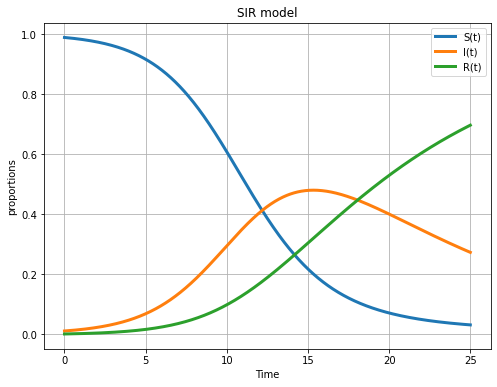

In [6]:
plotSIR(beta, gamma, maxT)